# 📊 Sales Analytics — Professional Project

**Author:** Musaib Baig

**Description:** This notebook performs an end-to-end sales data analysis: data loading, cleaning, EDA, visualizations, and business insights. It's formatted for a portfolio / GitHub submission.

## ⭐ Project Overview

**Goal:** Analyze sales data to identify top products, regional trends, monthly patterns, and produce an automated Excel report. This notebook is organized into clear sections with explanations and reproducible code.

## 📁 Dataset

- Source file: `data/Advanced_Sales_Report.xlsx` (if provided)
- Expected columns: `Date, Product, Quantity, Price, Region, CustomerID (optional)`

> If your dataset uses different column names, adjust the column references in the cleaning cell.

## 📥 1) Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import Workbook
from openpyxl.chart import BarChart, LineChart, Reference


## 📂 2) Load dataset

Upload your dataset (Excel/CSV). If using Colab, upload or mount Google Drive. Below is a helper to load a local `data/Advanced_Sales_Report.xlsx` or upload in Colab.

In [6]:
from google.colab import files
import io

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
  # If the uploaded file is 'sales_data.csv', you can then read it into a DataFrame.
  # For example:
  # df = pd.read_csv(io.BytesIO(uploaded['sales_data.csv']))

Saving sales_data.csv to sales_data (1).csv
User uploaded file "sales_data (1).csv" with length 625136 bytes


## 🔎 3) Quick data peek
Show first rows and basic info to understand the dataset.

In [15]:


df.head()


,Order_ID,Product,Region,Quantity,Price,Date,Sales,Total_Sales
0,1,Printer,East,7,46032,2021-01-01 00:00:00.000000000,322224,322224
1,2,Keyboard,West,4,34859,2021-01-01 02:37:33.105310531,139436,139436
2,3,Monitor,East,2,43861,2021-01-01 05:15:06.210621062,87722,87722
3,4,Printer,West,5,35946,2021-01-01 07:52:39.315931593,179730,179730
4,5,Headphones,West,3,47360,2021-01-01 10:30:12.421242124,142080,142080


## 🧹 4) Data cleaning & preprocessing
- Convert date to datetime
- Remove duplicates and NaNs
- Create `Total_Sales = Quantity * Price`
- Extract Month and Year
- Remove outliers using IQR

Adjust column names below if your dataset differs.

In [16]:
# Date Fix
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove blank rows
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Make Total Sales Column
df['Total_Sales'] = df['Quantity'] * df['Price']

# extract year, month
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     10000 non-null  int64         
 1   Product      10000 non-null  object        
 2   Region       10000 non-null  object        
 3   Quantity     10000 non-null  int64         
 4   Price        10000 non-null  int64         
 5   Date         10000 non-null  datetime64[ns]
 6   Sales        10000 non-null  int64         
 7   Total_Sales  10000 non-null  int64         
 8   Month        10000 non-null  int32         
 9   Year         10000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(5), object(2)
memory usage: 703.3+ KB


## 📊 5) Key Performance Indicators (KPIs)
Calculate total revenue, total quantity, unique products, top product and top region.

In [ ]:
kpis = {}
kpis['Total_Revenue'] = df['Total_Sales'].sum() if 'Total_Sales' in df.columns else None
kpis['Total_Orders'] = len(df)
kpis['Unique_Products'] = df['Product'].nunique() if 'Product' in df.columns else None
kpis['Top_Product'] = df.groupby('Product')['Total_Sales'].sum().idxmax() if 'Product' in df.columns and 'Total_Sales' in df.columns else None
kpis['Top_Region'] = df.groupby('Region')['Total_Sales'].sum().idxmax() if 'Region' in df.columns and 'Total_Sales' in df.columns else None
kpis


## 🔍 6) Exploratory Data Analysis (Pivot tables)
Top products, region sales, monthly trends.

In [19]:
print("Total Revenue:", df['Total_Sales'].sum())
print("Total Orders:", len(df))
print("Unique Customers:", df['CustomerID'].nunique() if 'CustomerID' in df.columns else "N/A")
print("Top Product:", df.groupby("Product")['Total_Sales'].sum().idxmax())


Total Revenue: 1203946382
Total Orders: 9880
Unique Customers: N/A
Top Product: Mouse


## 📈 7) Visualizations
Top visualizations displayed below.

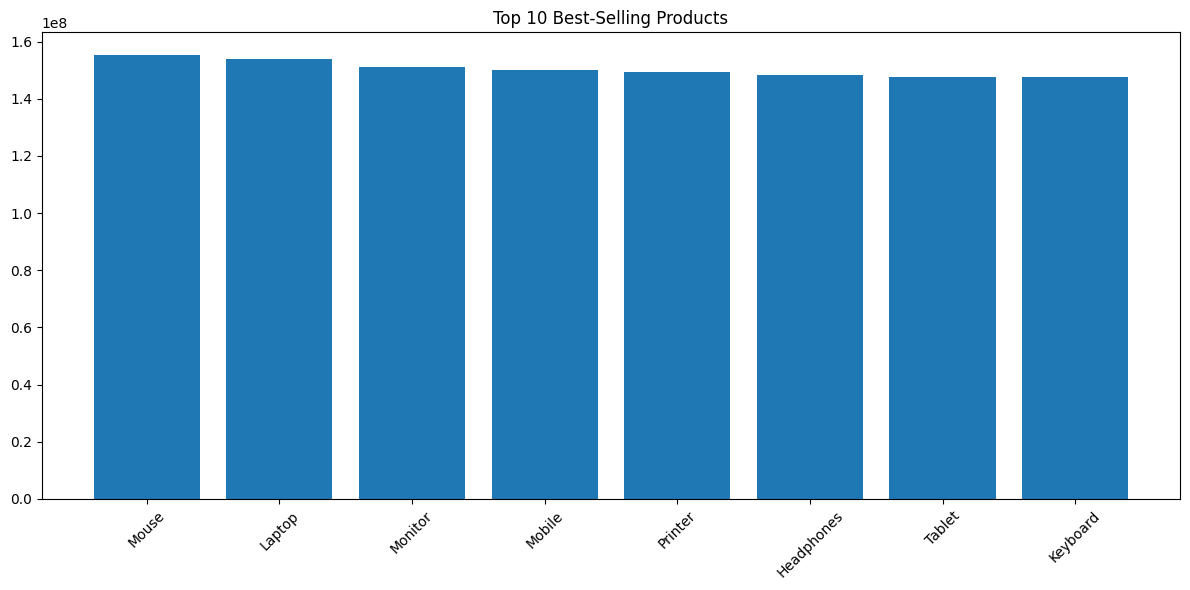

In [23]:
top10 = pivot_products.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10.index, top10['Total_Sales'])
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


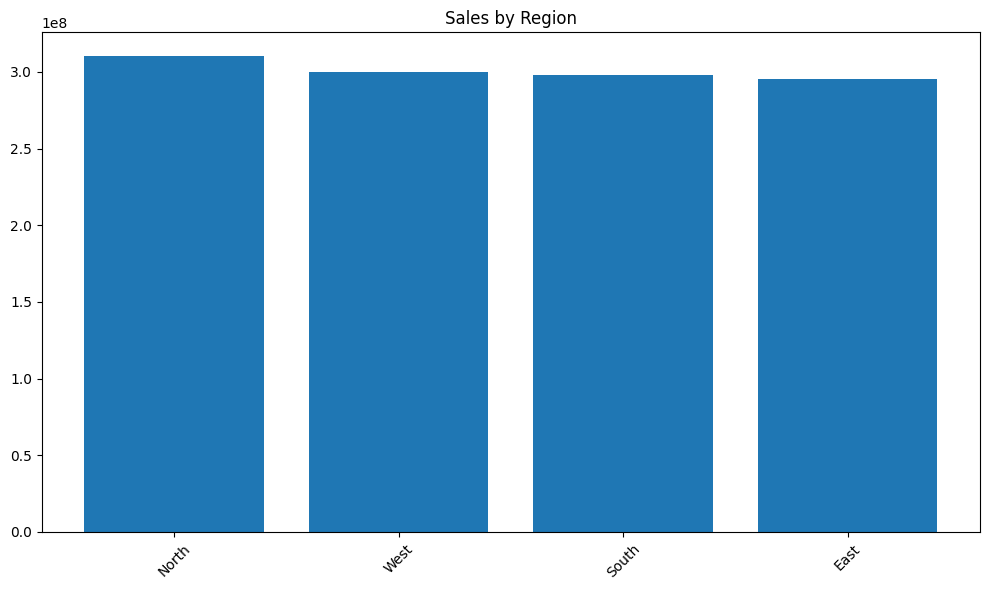

In [24]:
plt.figure(figsize=(10,6))
plt.bar(pivot_region.index, pivot_region['Total_Sales'])
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


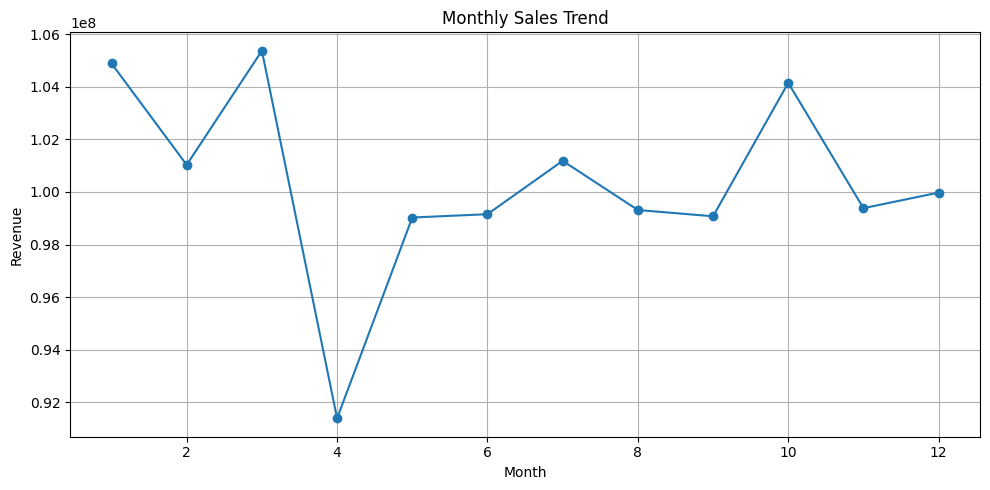

In [25]:
plt.figure(figsize=(10,5))
plt.plot(pivot_month.index, pivot_month['Total_Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


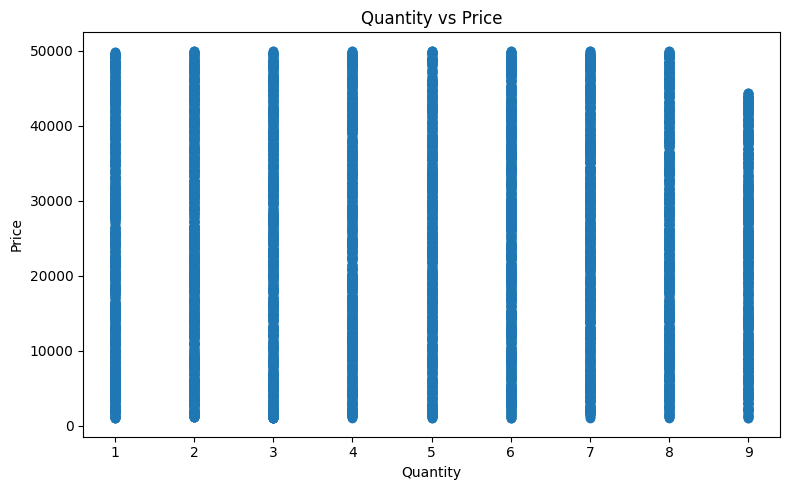

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['Price'])
plt.title("Quantity vs Price")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


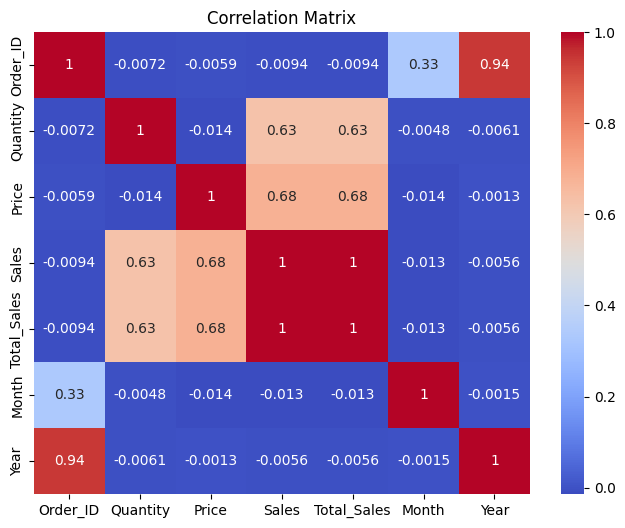

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

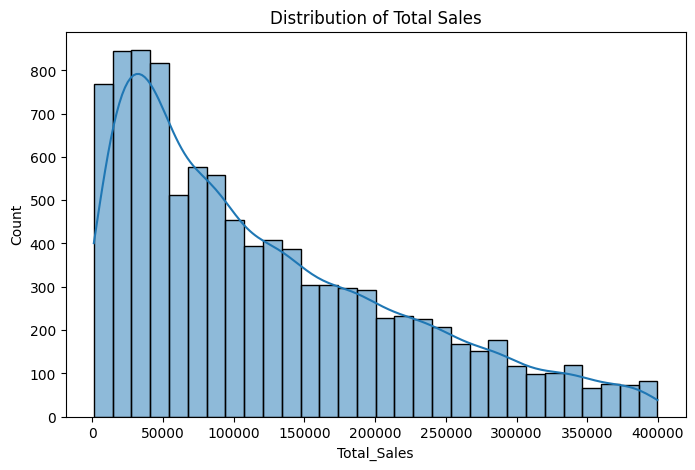

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.show()


## 📝 8) Insights & Conclusion
- Summarize the top findings
- Provide 3 business recommendations


### 🔚 Next Steps
1. Build forecasting model for next-quarter sales.
2. Segment customers for targeted promotions.
3. Automate daily/weekly Excel/PDF reporting to stakeholders.